# <div align="center"> ![Logo](https://www.ups.edu.ec/ups_portal-theme/images/ups/home/logo-ups-home.png)
# <div align="center">  Examen
## Materia:
### <div align="center"> Simulacion
## Docente:
### <div align="center"> Ing. Diego Qusi
## Estudiantes:
### <div align="center"> Ricardo Vinicio Jara Jara

<span style="color:red">Las claves de Twitter que se están utilizando en este examen. Pertenecen a Juan Cañar ya que a mi cuenta de Twitter no es aceptada como cuenta de desarrollador.</span>

### <center> <span style="color:red">Regresión de Twitter</span></center> 

In [550]:
#Importamos Librerias
import pandas as pd
import numpy as np
import tweepy as tw
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

In [551]:
# tokens y claves para acceder apy de twitter
consumer_key = "4JnLpCHZrSNWA9udcVjdoXPYf"
consumer_secret = "3sYWK7vpVCkls36iyf8EVGcPxFmT6F2pXTEZX5PhHxwpyTbEgg"
access_token = "202024170-280kigS0W8n2icIacC0oapfF0Y70LJU86wdQlFtw"
access_token_secret = "CznuxrXC3zCKSGN9elTBhqRko7geQY3BufGmY2RgQe5qr"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [552]:
#Comprobamos la coneccion a la api
try:
    api.verify_credentials()
    print("Login Exitoso")
except:
    print("Error")

Login Exitoso


### <center> Ingrese Texto a buscar </center>

In [553]:
txtBuscar = input('Ingrese texto a buscar:   ')

Ingrese texto a buscar:   #Ecuador


In [568]:
# Realizamis la busqueda 
#Buscamos los twittes mas populares
ts = api.search(txtBuscar, lang="es", count=100, result_type='popular') 
#Buscamos los twittes mas populares y mas recientes
#ts = api.search(txtBuscar, lang="es", count=100, result_type='mixed') 

In [569]:
#Genereamos nuestro DF
df = pd.DataFrame({'Usuario': list(map(lambda x: x.author.name , ts)),
                   'text': list(map(lambda x: x.text, ts)),
                   'rt': list(map(lambda x: x.retweet_count, ts)),
                   'favoritos': list(map(lambda x: x.favorite_count, ts)),
                   'seguidores': list(map(lambda x: x.author.followers_count, ts)),
                   'numtxt': list(map(lambda x: len(x.text), ts)),
                   'fecha': list(map(lambda x: x.created_at, ts)),
                   'hst':list(map(lambda x: x[0]['text'] if x != [] else '', list(map(lambda x: x.entities['hashtags'], ts))))})
df['fecha'] =pd.to_datetime(df.fecha)
df.sort_values(by='seguidores') 
df

,Usuario,text,rt,favoritos,seguidores,numtxt,fecha,hst
0,Andrés Arauz,Gracias compañeros y compañeras por su respald...,532,1245,55860,103,2020-12-18 20:43:25,Ecuador
1,El Comercio,"""Profe Nancy, buenas tardes. No puedo mandar e...",133,462,1787798,139,2020-12-19 17:36:57,
2,El Comercio,"#ATENCIÓN | Mathías, un bebé que estaba desapa...",43,66,1787798,134,2020-12-19 19:00:00,ATENCIÓN
3,El Comercio,"#Ecuador | “Queremos justicia"". Mauricio, segú...",106,220,1787798,140,2020-12-18 22:30:00,Ecuador
4,Evo Morales Ayma,Nuestro agradecimiento profundo al alcalde de ...,138,633,1182167,140,2020-12-18 19:09:15,Ecuador
5,ufcespanol,ES HORA #Ecuador‼️ pelea co-estelar #UFCVegas1...,34,127,333339,112,2020-12-20 01:57:58,Ecuador
6,JEFF,#Orgullo y #pasión\n\n@chitoveraUFC gracias po...,21,160,285561,140,2020-12-20 02:27:38,Orgullo
7,El Universo,Les compartimos la #ColumnaDeBonil de este 18 ...,432,1067,2214342,131,2020-12-18 12:30:32,ColumnaDeBonil
8,cnegobec,▶️ VIDEO | Con la participación de 16 instituc...,26,12,244695,140,2020-12-18 22:03:01,
9,teleSUR TV,La Corte Nacional de Justicia de #Ecuador🇪🇨 au...,17,12,1951135,140,2020-12-19 23:19:00,Ecuador


<AxesSubplot:xlabel='seguidores'>

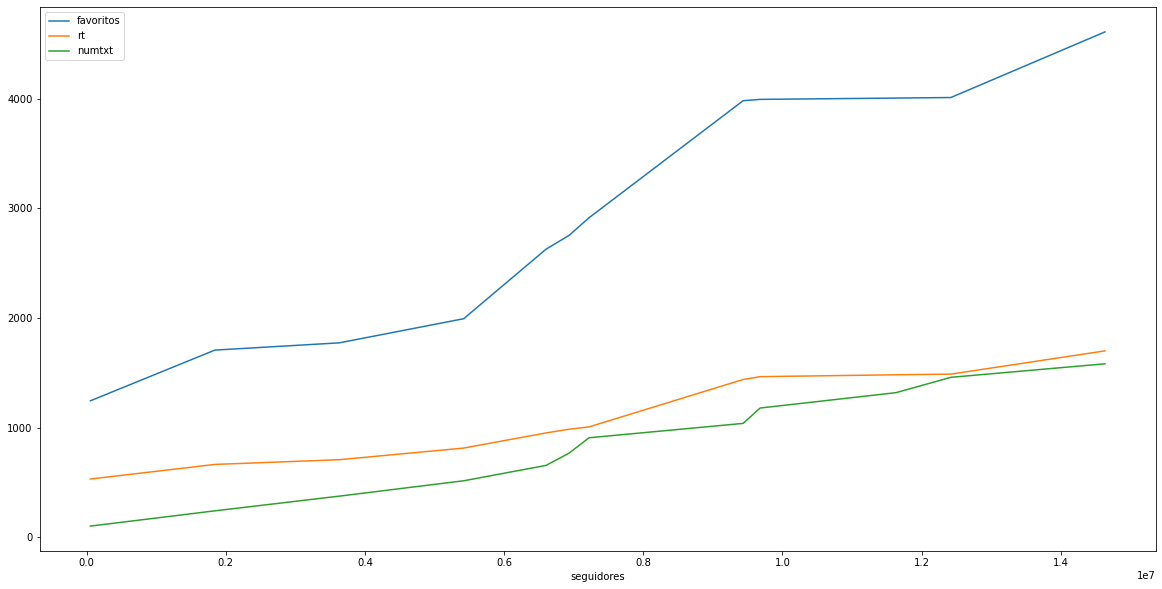

In [570]:
df1 = df.iloc[:, 2:7].cumsum()
df1.plot(x='seguidores', y=['favoritos','rt', 'numtxt'],figsize=(20,10))

# <center> Regresión Lineal<center>

In [571]:
#Sumamos el numero de seguidores + numero de rt y favoritos para obtener un solo punto 
df1["sum"] = df1[['favoritos','rt', 'numtxt']].sum(axis=1)
df2 = df1.iloc[:, [2,5]]
df2

,seguidores,sum
0,55860,1880
1,1843658,2614
2,3631456,2857
3,5419254,3323
4,6601421,4234
5,6934760,4507
6,7220321,4828
7,9434663,6458
8,9679358,6636
9,11630493,6805


In [572]:
x = list(df2.iloc [:, 0]) # seguidores
y = list(df2.iloc [:, 1]) # Total de la suma 

Z= 0.0004485857533154105 * 3740579 + 1569.679617226448 | Prediccion 3247.650065777253


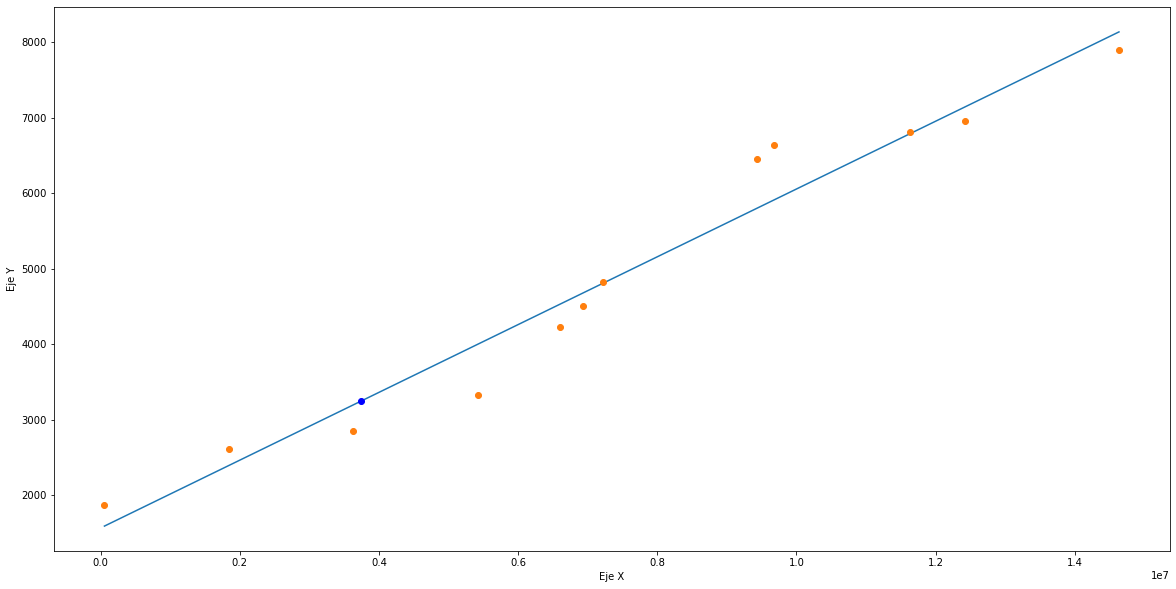

In [573]:
promedio = lambda a,y : sum(x) / len(y)
operacion1 = lambda x,y : sum((x-np.average(x))*(y-np.average(y)))/sum((x-np.average(x))*(x-np.average(x)))
operacion0 = lambda x,y : np.average(y)-operacion1(x,y)*np.average(x)

z = api.get_user('MashiRafael').followers_count

b1 =operacion1(x,y)
b0 =operacion0(x,y)
predecir= b1*z+b0
puntos_x = np.linspace(x[0],x[-1],6)
puntos_y = b0+b1*puntos_x
print('Z=',b1,'*',z,'+',b0, "| Prediccion",predecir)

plt.figure(figsize=(20,10))
plt.plot(puntos_x,puntos_y,)
plt.plot(x,y,"o") 
plt.plot(z,predecir,"o",color='blue') 
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.show()

# <center> Regresión Polinomial<center>

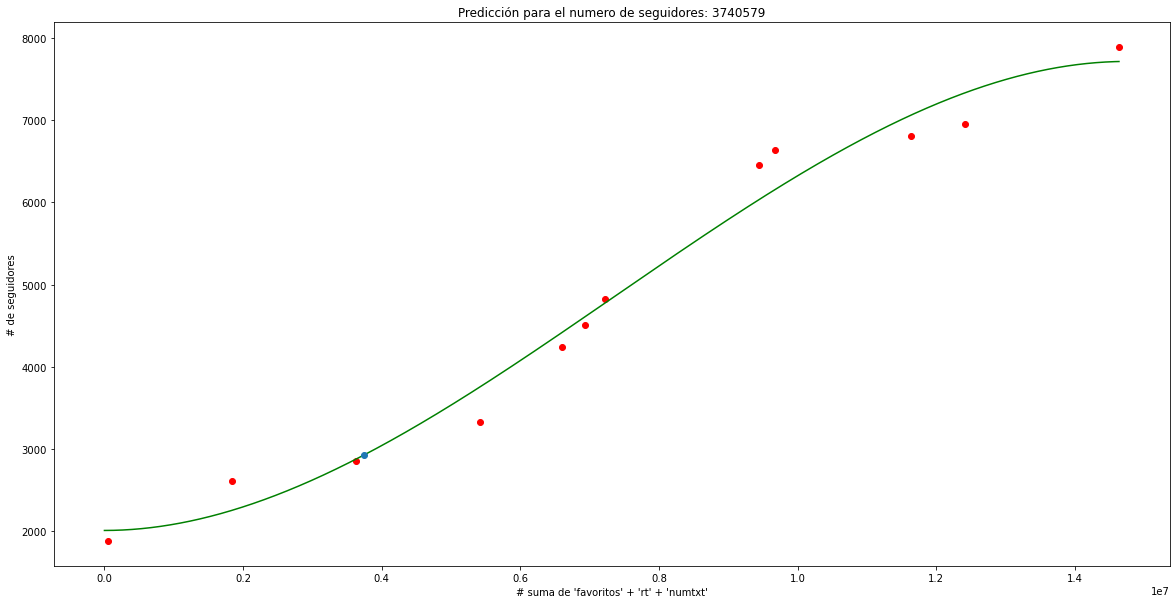

In [574]:
x = list(df2.iloc [:, 0]) # seguidores
y = list(df2.iloc [:, 1]) # Total de la suma
z = api.get_user('MashiRafael').followers_count

pf = PolynomialFeatures(degree = 4)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,max(x)+50))

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
respuesta =  round(-(prediccion_entrenamiento[z]))
plt.figure(figsize=(20,10))
plt.title('Predicción para el numero de seguidores: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='green')
plt.scatter(x,y,label="Datos Reales",color="red")
plt.xlabel("# suma de 'favoritos' + 'rt' + 'numtxt'")
plt.ylabel("# de seguidores")
plt.plot(z,prediccion_entrenamiento[z], 'o')
plt.show()

### <center> <span style="color:red">Eventos Discretos | Simpy</span></center> 

#### Elecciones de asambleístas del Azuay  
###### Se necesita 5 asambleístas. Pero en las presentes elecciones 90 aspirantes, Es decir existirán 18 partidos políticos.

In [113]:
import simpy
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [167]:
NUM_RECINTO = 1 #Esta variable no se esta usando ya que se pide analizar desde un solo mismo recinto

NUM_ASAMBLEISTAS = 5
NUM_CANDIDATOS = 90 
VOTOS = np.zeros(NUM_CANDIDATOS, dtype=int)
NUM_RECINTO = 1 # 
NUM_MENSAS = 1
T_LLEGADAS = 10
TIEMPO_SIMULACION = 120
NUM_VOTANTES = 300 

TIEMPO_ESPERA  = 0.0 # tiempo de espera total
DURACION_TOTAL  = 0.0 # duracion de servicio total
FIN = 0.0 # minuto en el que finaliza

tiempo_esp = {}
tiempo_vot = {}
tiempo_car = {}

In [168]:
llegada = lambda persona, time : print ("---> ", persona," llego en minuto: ", time) #Imprime Llegada
salida = lambda persona, time : print ("<--- ", persona," Sale en minuto: ", time) #Imprime Salida
pasar_v = lambda persona, time, esp : print("<<>> ",persona, " pasa a vota en ", time, " minutos esperando", esp," <<>>") # timE
votacion = lambda persona, time : print(">>>> ",persona, " vota en ", time, " minutos  <<<") #Imprime Votacion
carnet = lambda persona, time : print("/\/\ ",persona, " optiene carnet en ", time, " minutos  /\/\ ") #Imprime Votacion

def votar(persona):
    global DURACION_TOTAL 
    tiempo_votar = random.randint(1,10)
    yield env.timeout(tiempo_votar)
    votacion(persona, tiempo_votar)
    DURACION_TOTAL = DURACION_TOTAL + tiempo_votar # suma total de tiempo
    # Asiganamos un voto aleatoria
    VOTOS[random.randint(0,NUM_CANDIDATOS-1)] = VOTOS[random.randint(0,NUM_CANDIDATOS-1)]  + 1
    tiempo_vot[persona]=env.now
    yield env.process(carnetizacion(persona))

def carnetizacion(persona):
    global DURACION_TOTAL 
    tiempo_carnet = random.randint(1,5)
    yield env.timeout(tiempo_carnet)
    carnet(persona, tiempo_carnet)
    DURACION_TOTAL = DURACION_TOTAL + tiempo_carnet # suma total de tiempo
    # Asiganamos un voto aleatoria
    tiempo_car[persona]=env.now
    
def persona (env, name, mesas):
    global TIEMPO_ESPERA
    global FIN
    llega = env.now # minuto de llegada de persona
    llegada(name, llega)
    tiempo_esp[str(name)] = env.now
    with mesas.request() as request: #Esperamos pasaar a mesas
        yield request # Obtiene turno
        pasa = env.now # Guarda el minuto cuado comienza a ser atendido
        espera = pasa - llega # Calcula el tiempo que espero
        TIEMPO_ESPERA = TIEMPO_ESPERA + espera # Acumula los tiempos de espera
        pasar_v(name, pasa, espera)
        yield env.process(votar(name)) # Invoca al de votar
        deja = env.now #Guarda el minuto en que termina el proceso votar 
        salida(name, deja)
        FIN = deja # Conserva globalmente el ultimo minuto de la simulacion


def elecciones(env, personal):
    llegada = 0
    for i in range(0,NUM_VOTANTES): # Para n clientes
        R = random.random()
        llegada = -T_LLEGADAS * math.log(R) # Distribucion exponencial
        yield env.timeout(llegada)  # Deja transcurrir un tiempo entre uno y otro
        i += 1
        env.process(persona(env, 'Persona %d' % i, personal)) 
        
print ("------------------- Simulacion Elecciones ------------------")
SEMILLA = 30
random.seed (SEMILLA)  # Cualquier valor
env = simpy.Environment() # Crea el objeto entorno de simulacion
personal = simpy.Resource(env, NUM_MENSAS) #Crea las mesas
env.process(elecciones(env, personal)) #Invoca el proceso princial
env.run() #Inicia la simulacion

------------------- Simulacion Elecciones ------------------
--->  Persona 1  llego en minuto:  6.178883937224562
<<>>  Persona 1  pasa a vota en  6.178883937224562  minutos esperando 0.0  <<>>
>>>>  Persona 1  vota en  1  minutos  <<<
/\/\  Persona 1  optiene carnet en  2  minutos  /\/\ 
<---  Persona 1  Sale en minuto:  9.178883937224562
--->  Persona 2  llego en minuto:  18.585374797303096
<<>>  Persona 2  pasa a vota en  18.585374797303096  minutos esperando 0.0  <<>>
--->  Persona 3  llego en minuto:  18.818791585723044
>>>>  Persona 2  vota en  1  minutos  <<<
/\/\  Persona 2  optiene carnet en  1  minutos  /\/\ 
<---  Persona 2  Sale en minuto:  20.585374797303096
<<>>  Persona 3  pasa a vota en  20.585374797303096  minutos esperando 1.766583211580052  <<>>
--->  Persona 4  llego en minuto:  28.051988794281677
>>>>  Persona 3  vota en  8  minutos  <<<
/\/\  Persona 3  optiene carnet en  1  minutos  /\/\ 
<---  Persona 3  Sale en minuto:  29.585374797303096
<<>>  Persona 4  pasa 

<<>>  Persona 97  pasa a vota en  1171.8294699942485  minutos esperando 40.30980555863698  <<>>
>>>>  Persona 97  vota en  2  minutos  <<<
/\/\  Persona 97  optiene carnet en  5  minutos  /\/\ 
<---  Persona 97  Sale en minuto:  1178.8294699942485
<<>>  Persona 98  pasa a vota en  1178.8294699942485  minutos esperando 46.278489606207586  <<>>
>>>>  Persona 98  vota en  2  minutos  <<<
/\/\  Persona 98  optiene carnet en  4  minutos  /\/\ 
<---  Persona 98  Sale en minuto:  1184.8294699942485
<<>>  Persona 99  pasa a vota en  1184.8294699942485  minutos esperando 48.68319733529552  <<>>
--->  Persona 102  llego en minuto:  1184.9856003440282
>>>>  Persona 99  vota en  6  minutos  <<<
--->  Persona 103  llego en minuto:  1190.9235694884967
/\/\  Persona 99  optiene carnet en  1  minutos  /\/\ 
<---  Persona 99  Sale en minuto:  1191.8294699942485
<<>>  Persona 100  pasa a vota en  1191.8294699942485  minutos esperando 54.736079851516024  <<>>
>>>>  Persona 100  vota en  2  minutos  <<<
/

<<>>  Persona 147  pasa a vota en  1666.8207988522838  minutos esperando 15.029326683345971  <<>>
>>>>  Persona 147  vota en  9  minutos  <<<
/\/\  Persona 147  optiene carnet en  5  minutos  /\/\ 
<---  Persona 147  Sale en minuto:  1680.8207988522838
<<>>  Persona 148  pasa a vota en  1680.8207988522838  minutos esperando 20.176070724559395  <<>>
>>>>  Persona 148  vota en  3  minutos  <<<
/\/\  Persona 148  optiene carnet en  3  minutos  /\/\ 
<---  Persona 148  Sale en minuto:  1686.8207988522838
<<>>  Persona 149  pasa a vota en  1686.8207988522838  minutos esperando 21.519512052365144  <<>>
>>>>  Persona 149  vota en  5  minutos  <<<
/\/\  Persona 149  optiene carnet en  3  minutos  /\/\ 
<---  Persona 149  Sale en minuto:  1694.8207988522838
--->  Persona 150  llego en minuto:  1696.7160614607633
<<>>  Persona 150  pasa a vota en  1696.7160614607633  minutos esperando 0.0  <<>>
>>>>  Persona 150  vota en  1  minutos  <<<
--->  Persona 151  llego en minuto:  1697.929595790561
/\/

<---  Persona 196  Sale en minuto:  2257.3845736634976
<<>>  Persona 197  pasa a vota en  2257.3845736634976  minutos esperando 10.577992684573928  <<>>
--->  Persona 199  llego en minuto:  2260.9990653774134
>>>>  Persona 197  vota en  7  minutos  <<<
--->  Persona 200  llego en minuto:  2265.930412141895
--->  Persona 201  llego en minuto:  2267.490060873307
/\/\  Persona 197  optiene carnet en  4  minutos  /\/\ 
<---  Persona 197  Sale en minuto:  2268.3845736634976
<<>>  Persona 198  pasa a vota en  2268.3845736634976  minutos esperando 19.694903408275422  <<>>
>>>>  Persona 198  vota en  6  minutos  <<<
--->  Persona 202  llego en minuto:  2275.2854975755504
/\/\  Persona 198  optiene carnet en  2  minutos  /\/\ 
<---  Persona 198  Sale en minuto:  2276.3845736634976
<<>>  Persona 199  pasa a vota en  2276.3845736634976  minutos esperando 15.385508286084132  <<>>
>>>>  Persona 199  vota en  6  minutos  <<<
/\/\  Persona 199  optiene carnet en  1  minutos  /\/\ 
<---  Persona 199  

--->  Persona 257  llego en minuto:  2865.457577206917
--->  Persona 258  llego en minuto:  2866.4486467772435
/\/\  Persona 256  optiene carnet en  3  minutos  /\/\ 
<---  Persona 256  Sale en minuto:  2866.817649152897
<<>>  Persona 257  pasa a vota en  2866.817649152897  minutos esperando 1.360071945980053  <<>>
--->  Persona 259  llego en minuto:  2866.8294023733242
>>>>  Persona 257  vota en  6  minutos  <<<
/\/\  Persona 257  optiene carnet en  3  minutos  /\/\ 
<---  Persona 257  Sale en minuto:  2875.817649152897
<<>>  Persona 258  pasa a vota en  2875.817649152897  minutos esperando 9.369002375653508  <<>>
>>>>  Persona 258  vota en  2  minutos  <<<
/\/\  Persona 258  optiene carnet en  5  minutos  /\/\ 
<---  Persona 258  Sale en minuto:  2882.817649152897
<<>>  Persona 259  pasa a vota en  2882.817649152897  minutos esperando 15.988246779572819  <<>>
>>>>  Persona 259  vota en  5  minutos  <<<
/\/\  Persona 259  optiene carnet en  5  minutos  /\/\ 
<---  Persona 259  Sale en

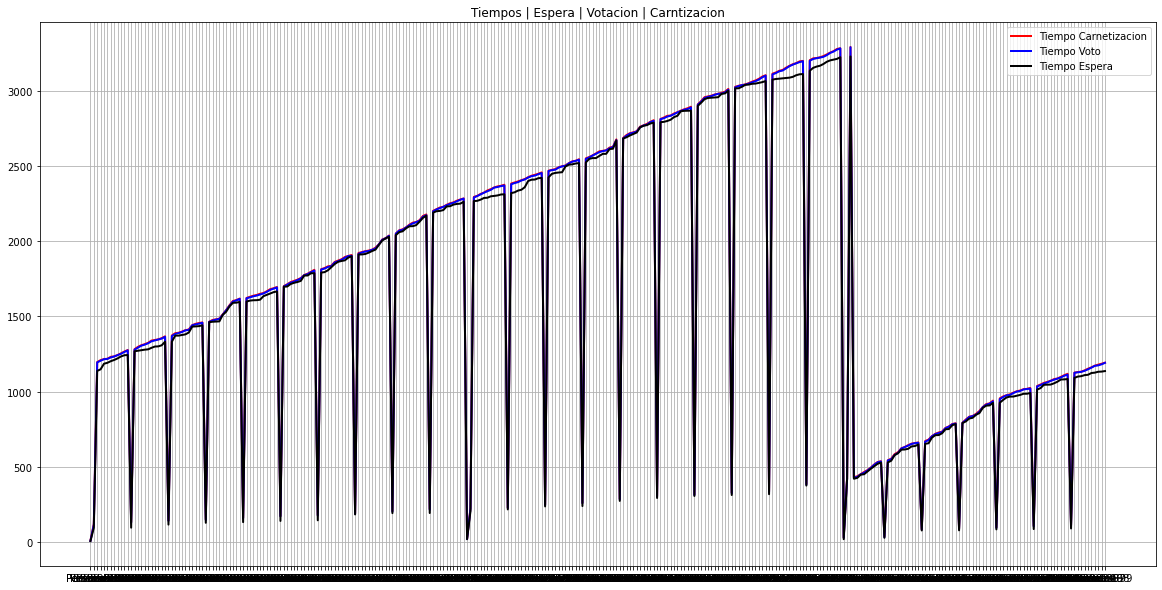

In [169]:
plt.figure(figsize=(20,10))

datos=sorted(tiempo_car.items())
x, y =zip(*datos)
plt.plot(x,y,linewidth=2,color='red', label='Tiempo Carnetizacion')

datos=sorted(tiempo_vot.items())
x, y =zip(*datos)
plt.plot(x,y,linewidth=2,color='blue', label='Tiempo Voto')

datos=sorted(tiempo_esp.items())
x, y =zip(*datos)
plt.plot(x,y,linewidth=2,color='black', label='Tiempo Espera')

plt.legend()
plt.title("Tiempos | Espera | Votacion | Carntizacion")
plt.grid(True) 
plt.show()

##### <center> <span style="color:blue">Resultados Eleciones </span></center> 

In [171]:
#Resultado Eleciones 
VOTOS

array([6, 5, 1, 2, 2, 3, 4, 5, 4, 3, 1, 3, 3, 4, 2, 4, 7, 3, 4, 2, 7, 5,
       6, 4, 4, 2, 4, 2, 2, 5, 3, 4, 3, 4, 5, 1, 3, 5, 3, 5, 3, 5, 6, 0,
       7, 4, 3, 5, 2, 4, 3, 4, 3, 4, 2, 5, 6, 3, 4, 1, 1, 5, 5, 6, 2, 1,
       4, 6, 6, 2, 1, 5, 5, 7, 3, 2, 3, 5, 6, 4, 4, 1, 6, 4, 5, 4, 3, 3,
       5, 3])

In [172]:
VOTOS = -np.sort(-VOTOS)
VOTOS

array([7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [173]:
electos = VOTOS[0:5]
electos

array([7, 7, 7, 7, 6])

Text(0.5, 1.0, '# numero de votos candidatos ganadores')

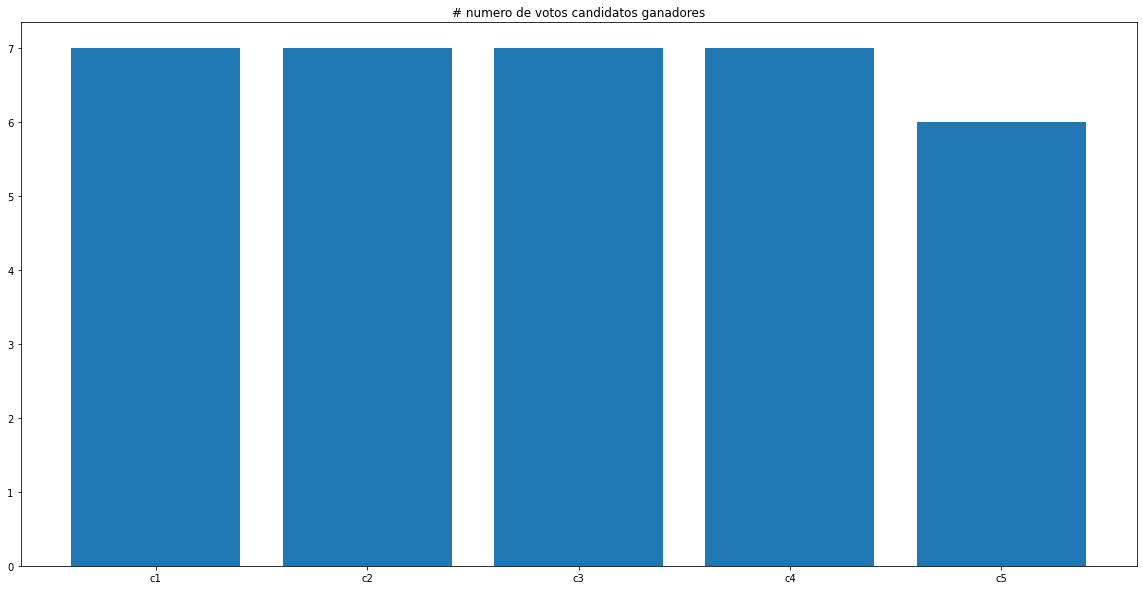

In [174]:
plt.figure(figsize=(20,10))
plt.bar(['c1','c2','c3','c4','c5'], electos)
plt.title("# numero de votos candidatos ganadores")

## Conclusiones
Con la ayuda de las Apis y de las librerías de Python podemos realizar simulación y predicciones sobre temas recientes en Twitter. En este caso con la búsqueda de un texto se podría buscar los tuits más relevantes y con un numero de seguidores de una cuenta se podría predecir cuentos retweet más número de favoritos y numero de palabras en el texto, se predecirá el estatus del tuit. 

Con la ayuda de sympy se podría simular eventos discretos como las de una elección. Ya que se puede simular el tiempo del ingreso de una persona y el tiempo que toma de acuerdo a un número de personas y numero de mesas. 

## Referencias 
[1] https://naps.com.mx/blog/simulacion-en-python-usando-simpy/     
[2] https://github.com/mzalaya/regression-analysis-with-python   
[3] https://github.com/sinclam2/regression-analysis-with-python   
[4]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/   
[5]: https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/   
[6]: https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf   
[7]: http://opac.pucv.cl/pucv_txt/txt-8000/UCC8094_01.pdf  
